# Technical Challenge

## 1. We will start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

## 2. Import the Dataset and start with some EDA

In [2]:
df = pd.read_csv("measurements.csv")
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
# Let's do some Data Exploration (Shape, Null Values, and similars)
df.shape

(388, 12)

In [4]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
df = df.dropna(subset=['temp_inside'])

In [7]:
# Something that got my attention, ["SPECIALS"], ['REFILL LITERS'] and ['REFILL GAS'] column seems to have a high % of null values
# We will drop them since they are not bringing useful information 
df = df.drop(['specials', 'refill liters', 'refill gas'], axis = 1)

In [8]:
# Now we have a cleaner dataset
# Most important variables we should keep an eye on? -- GAS TYPE!
df.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [9]:
# Lets keep with Data Cleaning. What things should be changed?
#1. Every variable should have same data type for better data manipulation. From object to float
#2. Commas should be replaced by dots! These are: distance, consume, temp_inside

In [10]:
# Distance
df['distance'] = df['distance'].str.replace(',', '.').astype(float)

In [11]:
# Same for the rest
df['consume'] = df['consume'].str.replace(',', '.').astype(float)
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

In [12]:
df['temp_outside'] = pd.to_numeric(df['temp_outside'])

In [13]:
df.gas_type.value_counts()
# Good to know that the proportion of SP98 values is higher...

SP98    219
E10     157
Name: gas_type, dtype: int64

## 3. Analysis

### 3.1) Average consumption per distance and per gas type

In [14]:
# Group the data by gas type
grouped = df.groupby('gas_type')

# Compute the average consumption per distance for each gas type
avg_consumption = grouped.apply(lambda x: x['consume'].mean() / x['distance'].mean())

# Print the results
print(avg_consumption)

gas_type
E10     0.234692
SP98    0.260080
dtype: float64


In [15]:
print("The average consumption per distance and per gas type is 0.23375 for E10 and 0.26283 for SP98. On average, consumption of SP98 is sligthly higher than for E10, which makes this second one more efficient at first sight")

The average consumption per distance and per gas type is 0.23375 for E10 and 0.26283 for SP98. On average, consumption of SP98 is sligthly higher than for E10, which makes this second one more efficient at first sight


### 3.4) Average speed per type of gas

In [19]:
# Calculate the average speed per gas type
avg_speed = df.groupby('gas_type')['distance'].mean() / (df.groupby('gas_type')['consume'].mean()/100)

# Convert the calculated values to a new DataFrame
avg_speed_df = pd.DataFrame(avg_speed).reset_index()
avg_speed_df.columns = ['gas_type', 'Avg. Speed']

# Display the DataFrame showing the average speed per gas type
print(avg_speed_df)

  gas_type  Avg. Speed
0      E10  426.090313
1     SP98  384.496557


In [20]:
print("The average speed each car undertakes under certain gas type is 426.09 for E10 and 384.49 for SP98. Quite high speeds...")

The average speed each car undertakes under certain gas type is 426.09 for E10 and 384.49 for SP98. Quite high speeds...


### 3.3) Let's see gas temperature values for the different types of gas

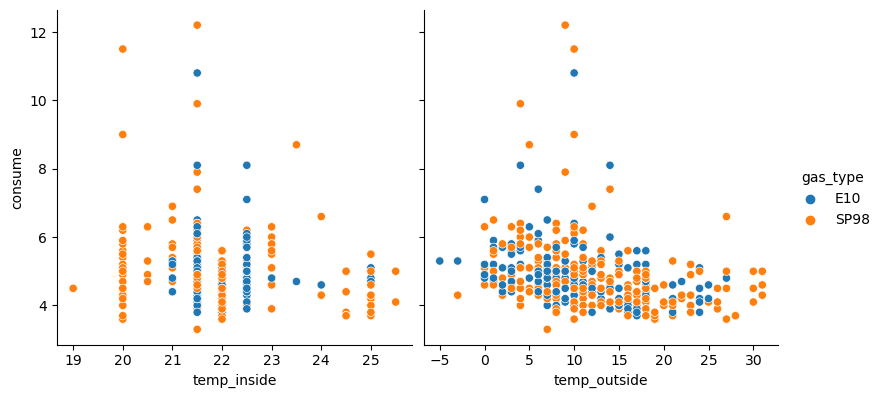

In [21]:
# Better to see visually! Create a scatter plot matrix using seaborn
sns.pairplot(df, x_vars=['temp_inside', 'temp_outside'], y_vars=['consume'], 
             hue='gas_type', height=4)

# Show the plot
plt.show()

In [22]:
# Group the data by gas type, internal temperature, and external temperature
grouped = df.groupby(['gas_type', 'temp_inside', 'temp_outside'])

# Compute the average consumption for each group
avg_consumption = grouped.apply(lambda x: x['consume'].mean())

# Print the results
print(avg_consumption)

gas_type  temp_inside  temp_outside
E10       21.0         -5              5.30
                       -3              5.30
                        0              5.00
                        3              4.40
          21.5          0              4.75
                                       ... 
SP98      25.0          23             4.00
                        30             5.00
                        31             4.45
          25.5          30             4.10
                        31             5.00
Length: 149, dtype: float64


In [23]:
print("It can be confirmed that in every computation that the lowest average internal and external temperature is for E10 gas type.")

It can be confirmed that in every computation that the lowest average internal and external temperature is for E10 gas type.


## 4. Plotting

In [24]:
# get dummmies for categorical values
dummies = pd.get_dummies(df['gas_type'])
# concat to df
df = pd.concat([df, dummies], axis = 1)

In [25]:
df.drop('gas_type', inplace = True, axis = 1)

In [26]:
# Check everything is okay
df.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0


Text(0.5, 1.0, 'Correlation Matrix Among Variables')

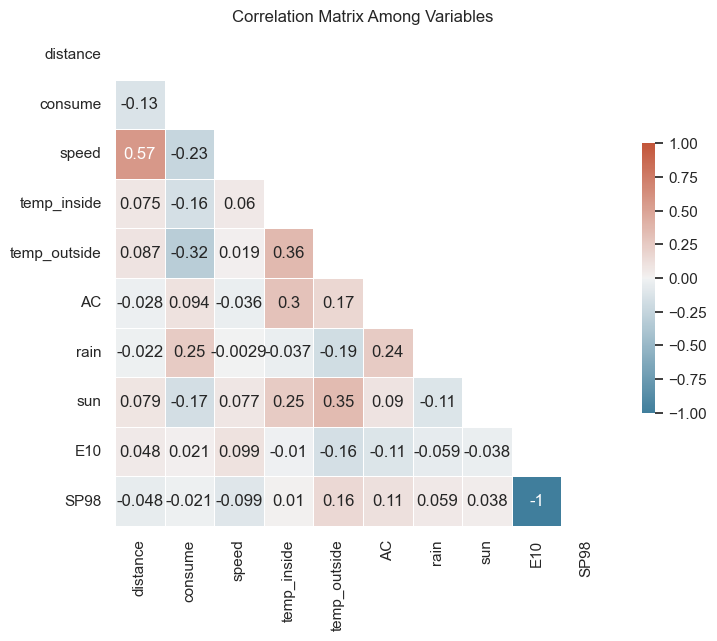

In [27]:
# Now that Data is cleaned, let's do some plotting
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Among Variables")

AxesSubplot(0.125,0.11;0.775x0.77)


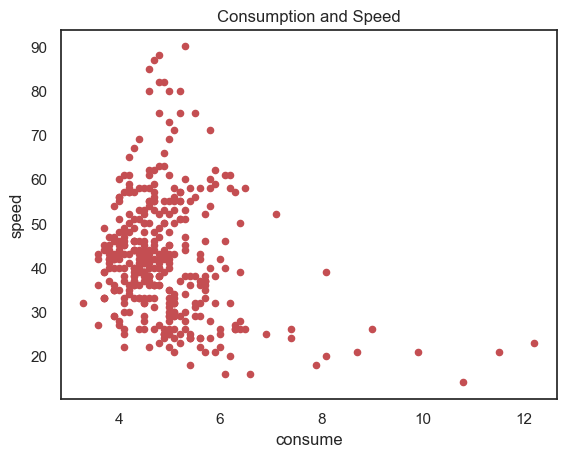

In [28]:
# Some Scatter Plots
ax1 = df.plot(kind='scatter', x='consume', y='speed', color='r')  
plt.title('Consumption and Speed')
print(ax1)

AxesSubplot(0.125,0.11;0.775x0.77)


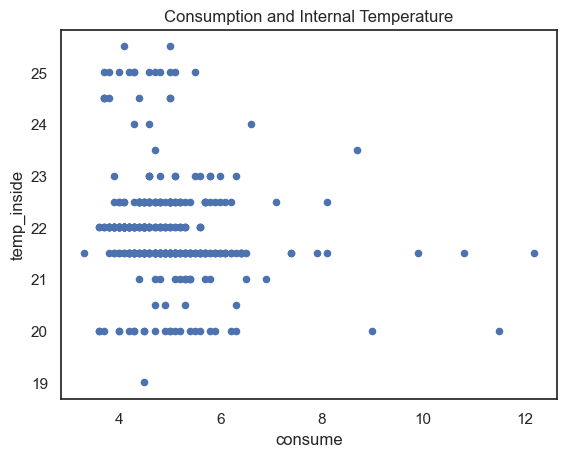

In [29]:
ax2 = df.plot(kind='scatter', x='consume', y='temp_inside', color='b')  
plt.title('Consumption and Internal Temperature')
print(ax2)

AxesSubplot(0.125,0.11;0.775x0.77)


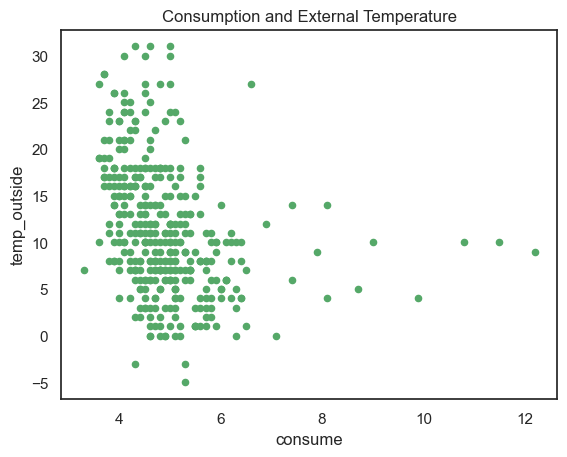

In [30]:
ax3 = df.plot(kind='scatter', x='consume', y='temp_outside', color='g')  
plt.title('Consumption and External Temperature')
print(ax3)

## 5. Supervised Learning - Regression

In [31]:
# So, which is the best combustible? The one which consumes the least at a certain speed. Target variable: Consumption

In [32]:
# Define my feature matrix and target variables
X = df[['distance', 'speed', 'temp_inside', 'temp_outside', 'E10', 'SP98']]
y = df['consume']

In [33]:
# Split my data into train and test settings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
reg = LinearRegression()

# Train the model on my training data
reg.fit(X_train, y_train)

# Score the model
reg.score(X_test, y_test)

0.18491963136574263

In [34]:
print("This model is obviously not working. Data has already been cleaned, and although many tecniques could be implemented, such as cross validation or hyperparameter tunning, lets go for Logistic Regression Model. At the end of the day we are dealing with binary variables (gas_type), so it is a model for regression that can work pretty well!")

This model is obviously not working. Data has already been cleaned, and although many tecniques could be implemented, such as cross validation or hyperparameter tunning, lets go for Logistic Regression Model. At the end of the day we are dealing with binary variables (gas_type), so it is a model for regression that can work pretty well!


#### Logistic Regression

In [35]:
# Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  
# Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.
# Source: StatisticalSolutions

In [36]:
# Defining the independent variables and the binary variables - two types of gas
X = df[['speed', 'distance', 'consume']]
y_e10 = df['E10']
y_sp98 = df['SP98']

# Split the data into training and testing sets
X_train_e10, X_test_e10, y_train_e10, y_test_e10 = train_test_split(X, y_e10, test_size=0.3, random_state=42)
X_train_sp98, X_test_sp98, y_train_sp98, y_test_sp98 = train_test_split(X, y_sp98, test_size=0.3, random_state=42)

# Create and fit a Logistic Regression model for E10
model_e10 = LogisticRegression()
model_e10.fit(X_train_e10, y_train_e10)

# Predict the values for the testing set and calculate accuracy
y_pred_e10 = model_e10.predict(X_test_e10)
accuracy_e10 = accuracy_score(y_test_e10, y_pred_e10)

# Create and fit a Logistic Regression model for SP98
model_sp98 = LogisticRegression()
model_sp98.fit(X_train_sp98, y_train_sp98)

# Predict the values for the testing set and calculate accuracy
y_pred_sp98 = model_sp98.predict(X_test_sp98)
accuracy_sp98 = accuracy_score(y_test_sp98, y_pred_sp98)

# Print the accuracy scores for both models
print('Accuracy score for E10: ', accuracy_e10)
print('Accuracy score for SP98: ', accuracy_sp98)

Accuracy score for E10:  0.6106194690265486
Accuracy score for SP98:  0.6106194690265486


In [37]:
# Compute metric: Mean squared error
mse_e10 = mean_squared_error(y_test_e10, y_pred_e10)
mse_sp98 = mean_squared_error(y_test_sp98, y_pred_sp98)

In [38]:
print(mse_e10)
print(mse_sp98)

0.3893805309734513
0.3893805309734513


In [39]:
# R squared metric
r2_e10 = r2_score(y_test_e10, y_pred_e10)
r2_sp98 = r2_score(y_test_sp98, y_pred_sp98)
print(r2_e10)
print(r2_sp98)

-0.5935897435897441
-0.5935897435897441


An accuracy of 0.61 indicates that the Logistic Regression model correctly predicted the binary variable (E10 or SP98) in 61% of the test set samples. While this is better than randomly guessing, it is not a particularly strong accuracy score.
      
The MSE of 0.38 indicates that the average squared difference between the predicted values and the true values is relatively high. This means that the model's predictions are not very precise and there is a considerable amount of error in the model.

The negative R2 score of -0.59 suggests that the model is not explaining much of the variance in the dependent variable (E10 or SP98). This could be because the independent variables are not strongly related to the binary variable or because the model is not capturing the true relationships between the variables.

To improve the solutions in the future, there are several steps I will approach. One approach is to try using different algorithms, such as Decision Trees or Random Forests, to see if they can improve the model's performance. Additionally, I could try adding more independent variables or engineering new features to capture more information about the dat, although this is more difficult since the data comes as it is. Another approach is to tune the hyperparameters of the Logistic Regression model, such as the regularization parameter or the solver, to see if this improves the model's accuracy and precision. 